# Task-4 Email Spam Detection With Machine Learning

# Importing Libraries

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.warn('Ignore')
# plt.style.use('dark_background'
sns.set_style("dark")
print('Done')

Done


/tmp/ipykernel_32/3226052205.py:6: UserWarning: Ignore
  warnings.warn('Ignore')


# Loading Dataset

In [104]:
df = pd.read_csv('/kaggle/input/sms-spam-collection-dataset/spam.csv', encoding='latin-1')

In [105]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [106]:
df.shape

(5572, 5)

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


# Data Cleaning

In [108]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True,axis=1)

In [109]:
df.rename(columns={'v1':'target', 'v2':'text'}, inplace=True)

In [110]:
df.columns

Index(['target', 'text'], dtype='object')

In [111]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['target']=encoder.fit_transform(df['target'])

In [112]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [113]:
df.duplicated().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0       False
1       False
2       False
3       False
4       False
        ...  
5567    False
5568    False
5569    False
5570    False
5571    False
Length: 5572, dtype: bool>

In [114]:
df=df.drop_duplicates(keep='first') # deletes the first occurrence.

In [115]:
df.shape

(5169, 2)

# Exploratory Data Analysis

In [116]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

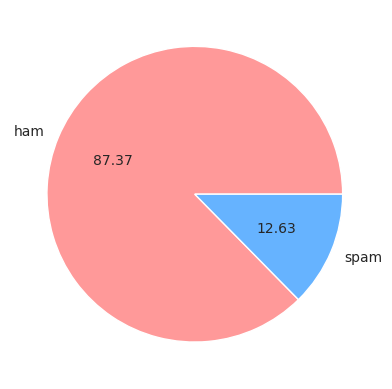

In [117]:
plt.pie(df['target'].value_counts(), labels=['ham','spam'], autopct='%0.2f',colors = ['#ff9999','#66b3ff'])
plt.show()

#### Data is imbalanced

In [118]:
# Natural Language Toolkit
import nltk

In [119]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

#### This tokenizer divides a text into a list of sentences by using anunsupervised algorithm to build a model for abbreviation words, collocations, and words that start sentences. It must be trained on a large collection of plaintext in the target language before it can be used.

## Fetch number of characters

In [120]:
df['num_chars']=df['text'].apply(len)

## Fetch number of words

In [121]:
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

## Number of sentences

In [122]:
df['num_sentence']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [123]:
df.head()

,target,text,num_chars,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


## For ham messages

In [124]:
df[['num_chars','num_words','num_sentence']].describe()

,num_chars,num_words,num_sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.286129,1.961308
std,58.236293,13.226400,1.432583
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,219.000000,38.000000


In [125]:
df[df['target']==0][['num_chars','num_words','num_sentence']].describe()

,num_chars,num_words,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,16.957484,1.815545
std,56.358207,13.394052,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,219.000000,38.000000


## For spam messages

In [126]:
df[df['target']==1][['num_chars','num_words','num_sentence']].describe()

,num_chars,num_words,num_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.474732,2.969372
std,30.137753,6.893007,1.488910
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,44.000000,9.000000


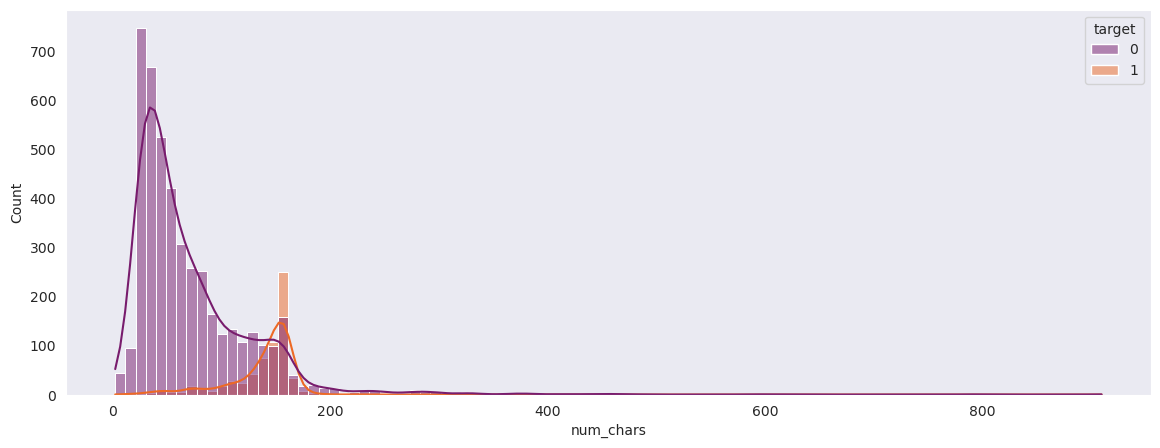

In [127]:
plt.figure(figsize=(14,5))
sns.histplot(data=df,x='num_chars',hue="target",palette="inferno",kde=True); 

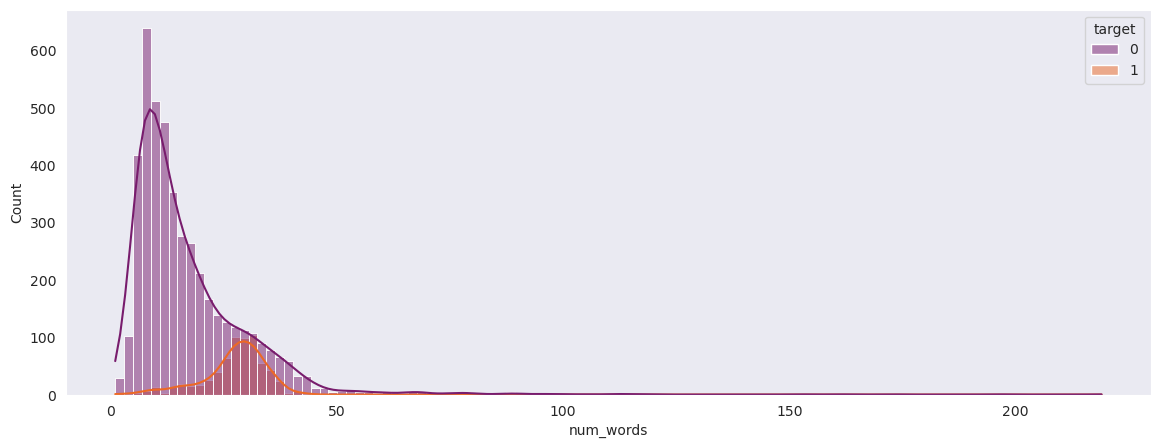

In [128]:
plt.figure(figsize=(14,5))
sns.histplot(data = df,hue='target',x='num_words',palette="inferno", kde=True); 

<Figure size 1400x500 with 0 Axes>

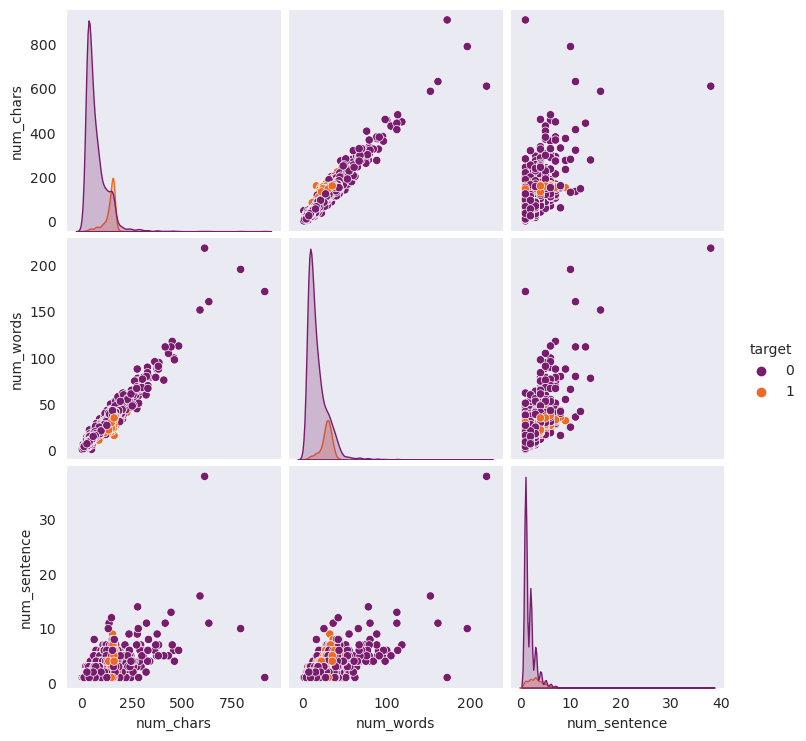

In [129]:
plt.figure(figsize=(14,5))
sns.pairplot(df,hue='target',palette='inferno');

/tmp/ipykernel_32/2264866656.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True);


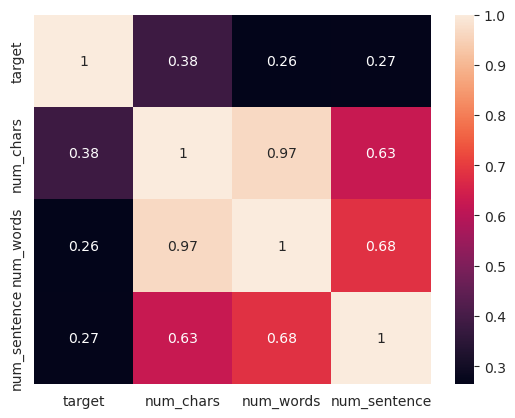

In [130]:
sns.heatmap(df.corr(),annot=True);

# NLP Data Preprocessing
- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

In [131]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
from nltk.corpus import stopwords
import string

In [132]:
def TextTransform(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [133]:
# stopwords.words("english") 

### These words  do no give any meaning to the sentence but are used in sentence formation

In [134]:
# string.punctuation

In [135]:
TextTransform('It is Spamming spammed spam Detection! 20%%')

'spam spam spam detect 20'

In [136]:
df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [137]:
df['transformed_text'] = df['text'].apply(TextTransform)

In [138]:
df.head()

,target,text,num_chars,num_words,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2,go jurong point avail bugi n great world la e ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [139]:
from wordcloud import WordCloud
wc= WordCloud(width=500,height=500, min_font_size = 10, background_color='black')

In [140]:
spam_wordcloud = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

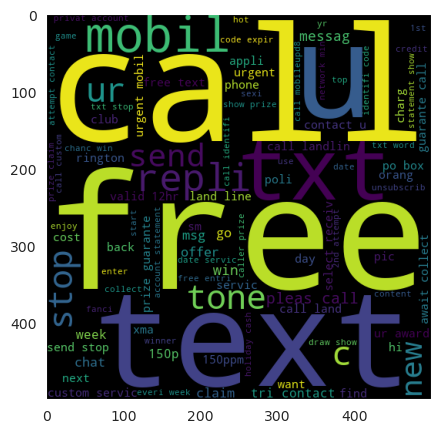

In [141]:
plt.figure(figsize=(14,5))
plt.imshow(spam_wordcloud)

In [142]:
ham_wordcloud = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

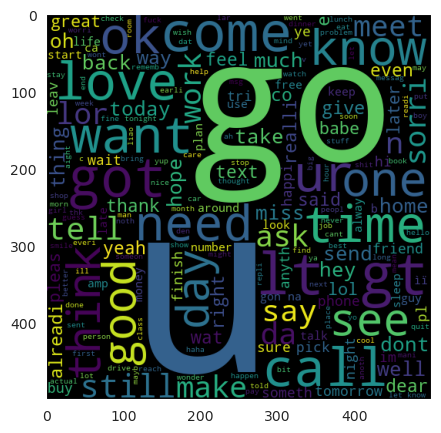

In [143]:
plt.figure(figsize=(14,5))
plt.imshow(ham_wordcloud)

### Top 30 spam messages

In [144]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [145]:
len(spam_corpus)

9883

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5169 entries, 0 to 5571
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   target            5169 non-null   int64 
 1   text              5169 non-null   object
 2   num_chars         5169 non-null   int64 
 3   num_words         5169 non-null   int64 
 4   num_sentence      5169 non-null   int64 
 5   transformed_text  5169 non-null   object
dtypes: int64(4), object(2)
memory usage: 411.7+ KB


Text(0.5, 1.0, 'Most Common Spam Messages')

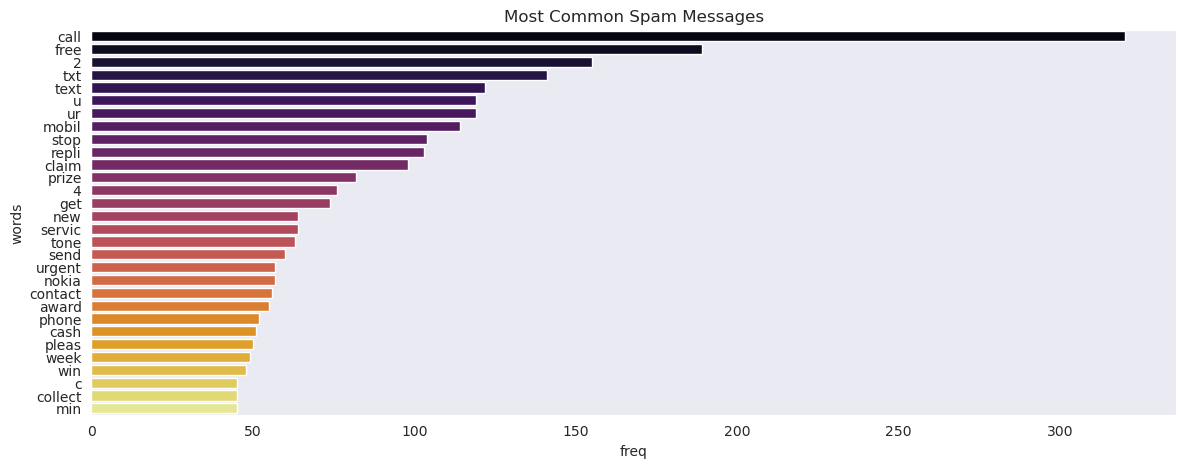

In [147]:
from collections import Counter
most_common_messages = pd.DataFrame(Counter(spam_corpus).most_common(30))
most_common_messages.columns = ["words","freq"]
plt.figure(figsize=(14,5))
sns.barplot(data = most_common_messages,y="words",x="freq", palette = 'inferno');
plt.title("Most Common Spam Messages")
# plt.xticks(rotations='vertical')

### Top 30 ham messages

In [148]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [149]:
len(ham_corpus)

34771

Text(0.5, 1.0, 'Most Common Ham Messages')

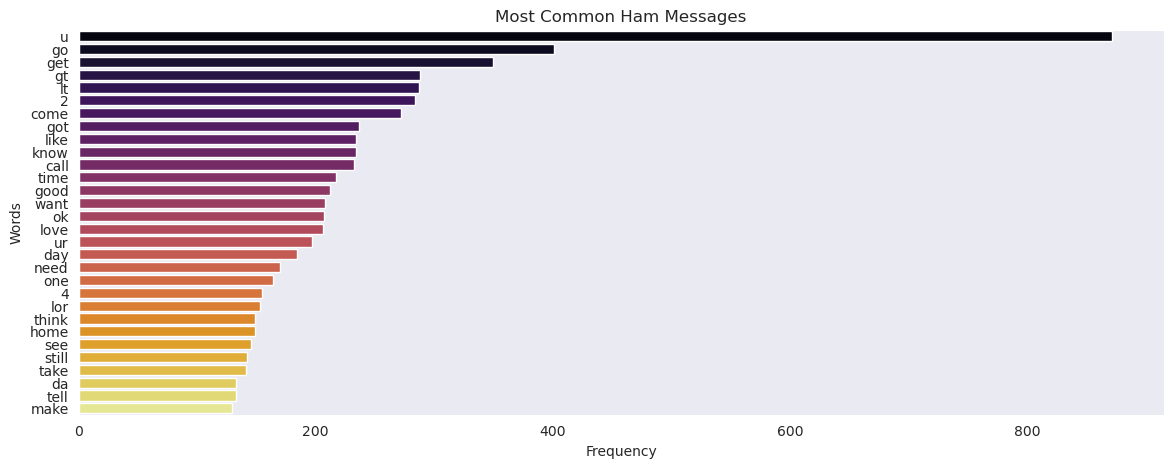

In [150]:
from collections import Counter
most_common_ham = pd.DataFrame(Counter(ham_corpus).most_common(30))
most_common_ham.columns = ["Words","Frequency"]
plt.figure(figsize=(14,5))
sns.barplot(data = most_common_ham,y="Words",x="Frequency", palette = 'inferno');
plt.title("Most Common Ham Messages")
# plt.xticks(rotations='vertical')

# Model Building

### Text Vectorization using Bag of Words

In [178]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [179]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [153]:
X.shape

(5169, 6629)

In [154]:
y = df['target'].values
y

In [164]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [169]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, classification_report

In [173]:
gnb_model = GaussianNB()
gnb_model.fit(X_train,y_train)
y_predict = gnb_model.predict(X_test)
print("="*100)
print("Accuracy Score:",accuracy_score(y_test,y_predict))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_predict))
print("\n",classification_report(y_test,y_predict))

Accuracy Score: 0.874274661508704
Confusion Matrix:
 [[786 110]
 [ 20 118]]

               precision    recall  f1-score   support

           0       0.98      0.88      0.92       896
           1       0.52      0.86      0.64       138

    accuracy                           0.87      1034
   macro avg       0.75      0.87      0.78      1034
weighted avg       0.91      0.87      0.89      1034



In [174]:
mnb_model = MultinomialNB()
mnb_model.fit(X_train,y_train)
y_predict = mnb_model.predict(X_test)
print("="*100)
print("Accuracy Score:",accuracy_score(y_test,y_predict))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_predict))
print("\n",classification_report(y_test,y_predict))

Accuracy Score: 0.965183752417795
Confusion Matrix:
 [[872  24]
 [ 12 126]]

               precision    recall  f1-score   support

           0       0.99      0.97      0.98       896
           1       0.84      0.91      0.87       138

    accuracy                           0.97      1034
   macro avg       0.91      0.94      0.93      1034
weighted avg       0.97      0.97      0.97      1034



In [175]:
bnb_model = BernoulliNB()
bnb_model.fit(X_train,y_train)
y_predict = bnb_model.predict(X_test)
print("="*100)
print("Accuracy Score:",accuracy_score(y_test,y_predict))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_predict))
print("\n",classification_report(y_test,y_predict))

Accuracy Score: 0.9709864603481625
Confusion Matrix:
 [[893   3]
 [ 27 111]]

               precision    recall  f1-score   support

           0       0.97      1.00      0.98       896
           1       0.97      0.80      0.88       138

    accuracy                           0.97      1034
   macro avg       0.97      0.90      0.93      1034
weighted avg       0.97      0.97      0.97      1034



In [177]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [180]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [181]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [182]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [183]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.925531914893617, 0.7194244604316546)

In [186]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.925531914893617
Precision -  0.7194244604316546
For  KN
Accuracy -  0.9061895551257253
Precision -  1.0
For  NB
Accuracy -  0.965183752417795
Precision -  0.84
For  DT
Accuracy -  0.9245647969052224
Precision -  0.9166666666666666
For  LR
Accuracy -  0.9738878143133463
Precision -  0.9743589743589743
For  RF
Accuracy -  0.9690522243713733
Precision -  1.0
For  AdaBoost
Accuracy -  0.9622823984526112
Precision -  0.9541284403669725
For  BgC
Accuracy -  0.9642166344294004
Precision -  0.9316239316239316
For  ETC
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829
For  GBDT
Accuracy -  0.9468085106382979
Precision -  0.946236559139785
For  xgb
Accuracy -  0.9748549323017408
Precision -  0.9666666666666667


In [188]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.906190,1.000000
5,RF,0.969052,1.000000
8,ETC,0.975822,0.982906
4,LR,0.973888,0.974359
10,xgb,0.974855,0.966667
6,AdaBoost,0.962282,0.954128
9,GBDT,0.946809,0.946237
7,BgC,0.964217,0.931624
3,DT,0.924565,0.916667
2,NB,0.965184,0.840000


In [189]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.906190
1,RF,Accuracy,0.969052
2,ETC,Accuracy,0.975822
3,LR,Accuracy,0.973888
4,xgb,Accuracy,0.974855
5,AdaBoost,Accuracy,0.962282
6,GBDT,Accuracy,0.946809
7,BgC,Accuracy,0.964217
8,DT,Accuracy,0.924565
9,NB,Accuracy,0.965184


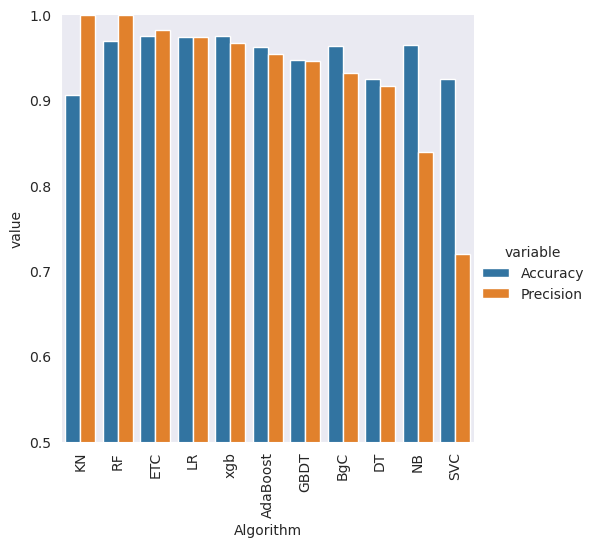

In [190]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

Observation:
* Highest performance was give by LogisticRegression Model around 97%%.
* But XgBoost,LGBM & catBoost Model performance was also good.
* So we can use LogisticRegression Model for spam email detection in future.

# Conclusion

Email Spam Detection using Machine Learning.

Key-Points

💡 First I did the basic understanding of data.

💡 Then I did Data Cleaning & EDA.

💡 We were havinng only textural independent feature in the dataset.

💡 So I have done to text preprocessing & data preprocessing for better model training.

💡 Then I have used different classifiers machine learning techniques for predictions.

💡 Then I have compared all the preddictions given by different classifier models.

💡 Then I have selected the best performing classifier modles.